# **WMM 2025L - Laboratorium 4. Podstawowe przetwarzanie obrazów**
## **Maciej Bogusławski (331362)**

Niniejszy notatnik stanowi sprawozdanie z laboratorium nr 4 z przedmiotu WMM.

331362 % 36 = 18

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcPSNR(img1, img2):
  imax = 255.**2  ### zakładana wartość pikseli z przedziału [0, 255]
  ##### w różnicy obrazów istotne są wartości ujemne, dlatego img1 konwertowany do typu np.float64 (liczby rzeczywiste) aby nie ograniczać wyniku do przedziału [0, 255]
  mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size  ### img1.size - liczba elementów w img1, ==img1.shape[0]*img1.shape[1] dla obrazów mono, ==img1.shape[0]*img1.shape[1]*img1.shape[2] dla obrazów barwnych
  return 10.0*np.log10(imax/mse)

In [3]:
def plt_imshow(img, img_title="image"):
    plt.figure() 
    plt.title(img_title) 
    # plt.imshow(img, cmap = "gray")  ### możliwe automatyczne skalowanie wartości pikseli
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)  ### bez skalowania wartości pikseli
    plt.xticks([]), plt.yticks([])
    plt.show()

In [4]:
def cv_imshow(img, img_title="image"):
    # cv2.namedWindow(img_title, cv2.WINDOW_AUTOSIZE)  # cv2.WINDOW_NORMAL
   
    ##### przeskalowanie obrazu z rzeczywistymi wartościami pikseli, żeby jedną funkcją wywietlać obrazy różnych typów
    if (img.dtype == np.float32) or (img.dtype == np.float64):
        img_ = img/255
    else:
        img_ = img
    cv2.imshow(img_title, img_)
    cv2.waitKey(0)  ### oczekiwanie przez bardzo krótki czas - okno się wyświetli, ale program się nie zablokuje, tylko będzie kontynuowany

In [5]:
data_dir = "./"

In [6]:
original_img = cv2.imread(data_dir+"obrazy/houses_col.png", cv2.IMREAD_UNCHANGED)

In [7]:
def printi(img, img_title="image"):
    print(f"{img_title}, wymiary: {img.shape}, typ danych: {img.dtype}, wartości: {img.min()} - {img.max()}")

In [8]:
cv_imshow(original_img, "original")
cv2.waitKey(0)
cv2.destroyAllWindows()


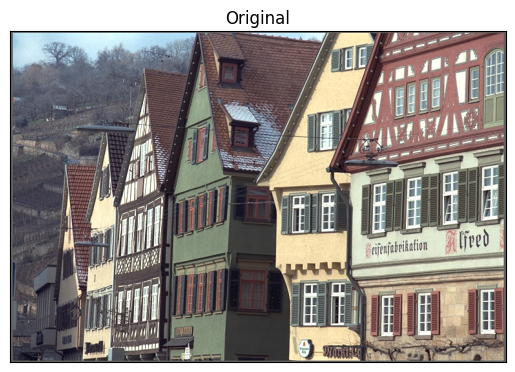

In [9]:
plt_imshow(original_img, "Original")

In [10]:
imshow = plt_imshow  ### wyświetlanie z użyciem cv2

In [36]:
def ex1():
    original_img = cv2.imread(data_dir+"obrazy/houses_col.png", cv2.IMREAD_UNCHANGED)
    gauss_noise_img = cv2.imread(data_dir+"obrazy/houses_col_noise.png", cv2.IMREAD_UNCHANGED)
    impulse_noise_img = cv2.imread(data_dir+"obrazy/houses_col_inoise_2.png", cv2.IMREAD_UNCHANGED)

    masks_sizes = [3, 5, 7]

    results = {
        "Szum gaussowski": {
            "Filtr Gaussa": {},
            "Filtr medianowy": {}
        },
        "Szum impulsowy": {
            "Filtr Gaussa": {},
            "Filtr medianowy": {}
        }
    }
    
    for i, size in enumerate(masks_sizes):
        gauss_filtered_gauss = cv2.GaussianBlur(gauss_noise_img, (size, size), 0)
        results["Szum gaussowski"]["Filtr Gaussa"][size]= calcPSNR(original_img, gauss_filtered_gauss)
        plt_imshow(gauss_filtered_gauss, f"Gauss image, gaussian blur with mask size {size}")

    for i, size in enumerate(masks_sizes):
        impulse_filtered_gauss = cv2.GaussianBlur(impulse_noise_img, (size, size), 0)
        results["Szum impulsowy"]["Filtr Gaussa"][size]= calcPSNR(original_img, impulse_filtered_gauss)
        plt_imshow(impulse_filtered_gauss, f"Impulse image, gaussian blur with mask size {size}")
        
        


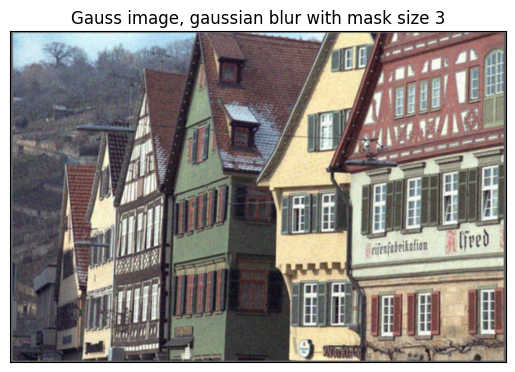

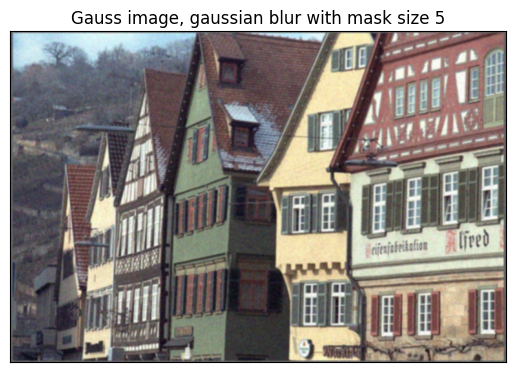

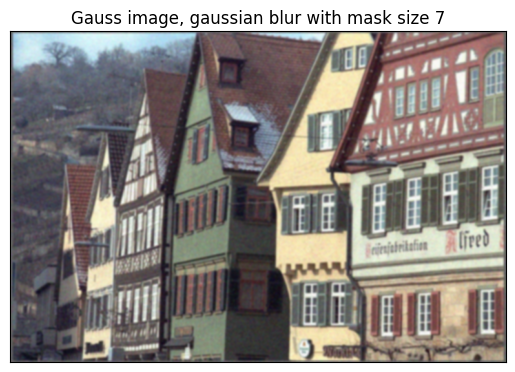

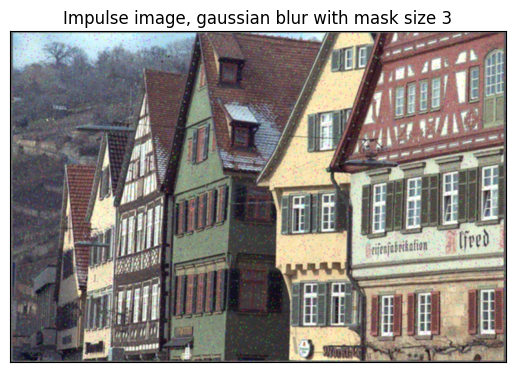

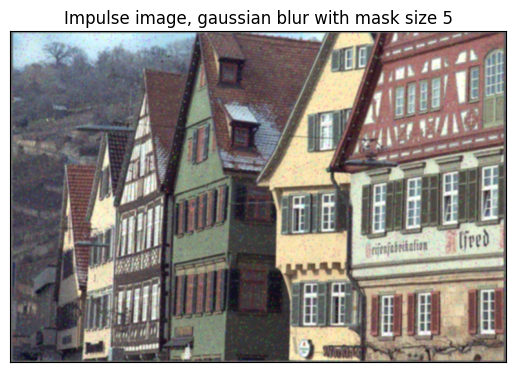

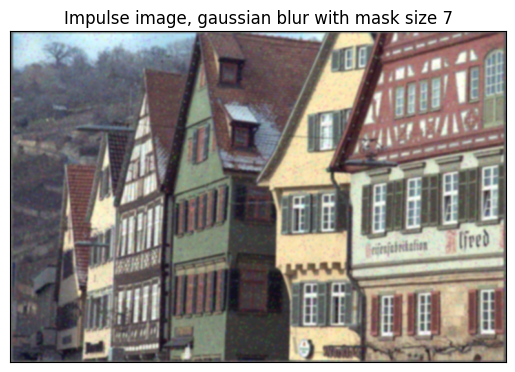

In [37]:
ex1()